# Construir un modelo de aprendizaje automático que permita predecir si un cliente potencial se convertirá en cliente real

Construir un modelo de aprendizaje automático que permita predecir si un cliente potencial se convertirá en cliente real.

El dataset que se utilizará para entrenar al modelo se encuentra disponible en kaggle (Leads.csv). Se recomienda revisar también el archivo Leads Data Dictionary.xlsx para entender cada una de las columnas del dataset.

Se trata de un problema de clasificación binaria. La variable objetivo será la columna Converted, que indicará con un 1 si el cliente se ha convertido en cliente real, o con un 0 en caso contrario.

Se debe realizar un procesamiento del dataset siguiendo las indicaciones indicadas en la teoría. El modelo se ha conseguido entrenar con dicho dataset logrando una precisión del ~90%. 

Una vez entrenado el modelo, se tendrá que desplegar como una aplicación web que responda con predicciones a las peticiones de los usuarios que envíen sus datos. La respuesta de las peticiones será un único booleano True si el cliente potencial se convertirá en cliente real con los datos proporcionados, o False en caso contrario.

## 1. Importación de los datos

In [1]:
import pandas as pd

df = pd.read_csv('../csv/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Preprocesamiento de los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3]:
# Valores únicos en cada columna
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [4]:
# Eliminamos las columnas que no aportan información
df = df.drop(columns=['Prospect ID', 'Lead Number'], axis=1)

# Eliminamos las columnas que tienen un solo valor único
df = df.drop(columns=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [5]:
# Eliminamos los espacios en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '')

# Vemos el porcentaje de valores nulos en cada columna
df.isnull().mean() * 100

LeadOrigin                                0.000000
LeadSource                                0.389610
DoNotEmail                                0.000000
DoNotCall                                 0.000000
Converted                                 0.000000
TotalVisits                               1.482684
TotalTimeSpentonWebsite                   0.000000
PageViewsPerVisit                         1.482684
LastActivity                              1.114719
Country                                  26.634199
Specialization                           15.562771
HowdidyouhearaboutXEducation             23.885281
Whatisyourcurrentoccupation              29.112554
Whatmattersmosttoyouinchoosingacourse    29.318182
Search                                    0.000000
NewspaperArticle                          0.000000
XEducationForums                          0.000000
Newspaper                                 0.000000
DigitalAdvertisement                      0.000000
ThroughRecommendations         

In [6]:
# Missing values

# Si es numérico, rellenamos con la media
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())
    
# Si es categórico, rellenamos con la moda
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df.isnull().mean() * 100

LeadOrigin                               0.0
LeadSource                               0.0
DoNotEmail                               0.0
DoNotCall                                0.0
Converted                                0.0
TotalVisits                              0.0
TotalTimeSpentonWebsite                  0.0
PageViewsPerVisit                        0.0
LastActivity                             0.0
Country                                  0.0
Specialization                           0.0
HowdidyouhearaboutXEducation             0.0
Whatisyourcurrentoccupation              0.0
Whatmattersmosttoyouinchoosingacourse    0.0
Search                                   0.0
NewspaperArticle                         0.0
XEducationForums                         0.0
Newspaper                                0.0
DigitalAdvertisement                     0.0
ThroughRecommendations                   0.0
Tags                                     0.0
LeadQuality                              0.0
LeadProfil

In [7]:
# Ordinal Encoding

# Columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Aplicamos Ordinal Encoding a las columnas categóricas
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

df.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,...,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,AfreecopyofMasteringTheInterview,LastNotableActivity
0,0.0,6.0,0.0,0.0,0,0.0,0,0.0,10.0,12.0,...,8.0,1.0,4.0,4.0,1.0,1.0,15.0,15.0,0.0,8.0
1,0.0,7.0,0.0,0.0,0,5.0,674,2.5,5.0,12.0,...,14.0,2.0,4.0,4.0,1.0,1.0,15.0,15.0,0.0,4.0
2,1.0,1.0,0.0,0.0,1,2.0,1532,2.0,5.0,12.0,...,19.0,2.0,3.0,0.0,1.0,0.0,14.0,20.0,1.0,4.0
3,1.0,1.0,0.0,0.0,0,1.0,305,1.0,13.0,12.0,...,14.0,3.0,4.0,0.0,1.0,0.0,13.0,17.0,0.0,8.0
4,1.0,3.0,0.0,0.0,1,2.0,1428,1.0,1.0,12.0,...,19.0,2.0,4.0,0.0,1.0,0.0,15.0,18.0,0.0,8.0


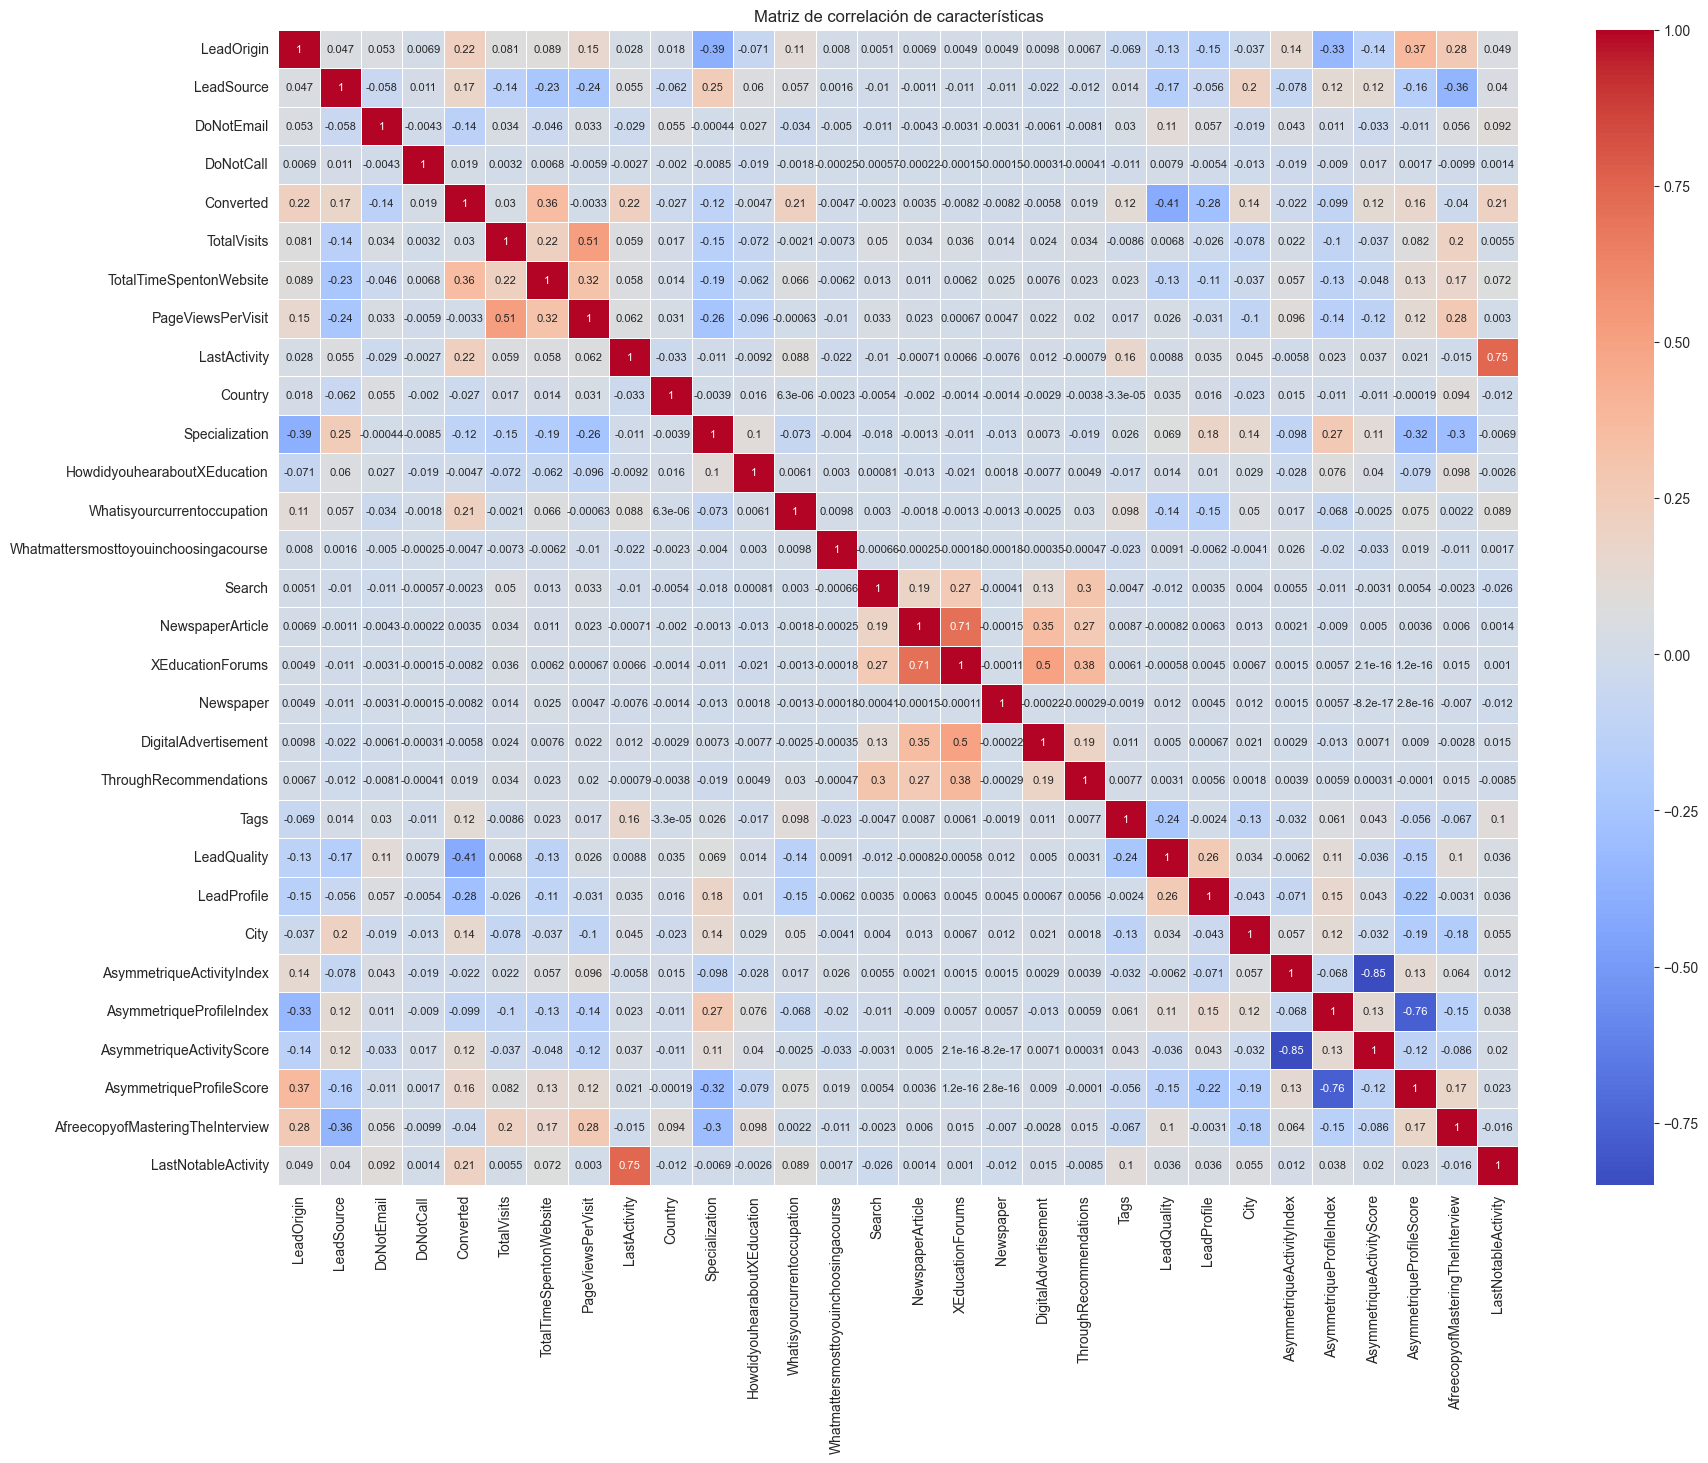

In [8]:
# ver la correlación de las variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de correlación de características')
plt.show()

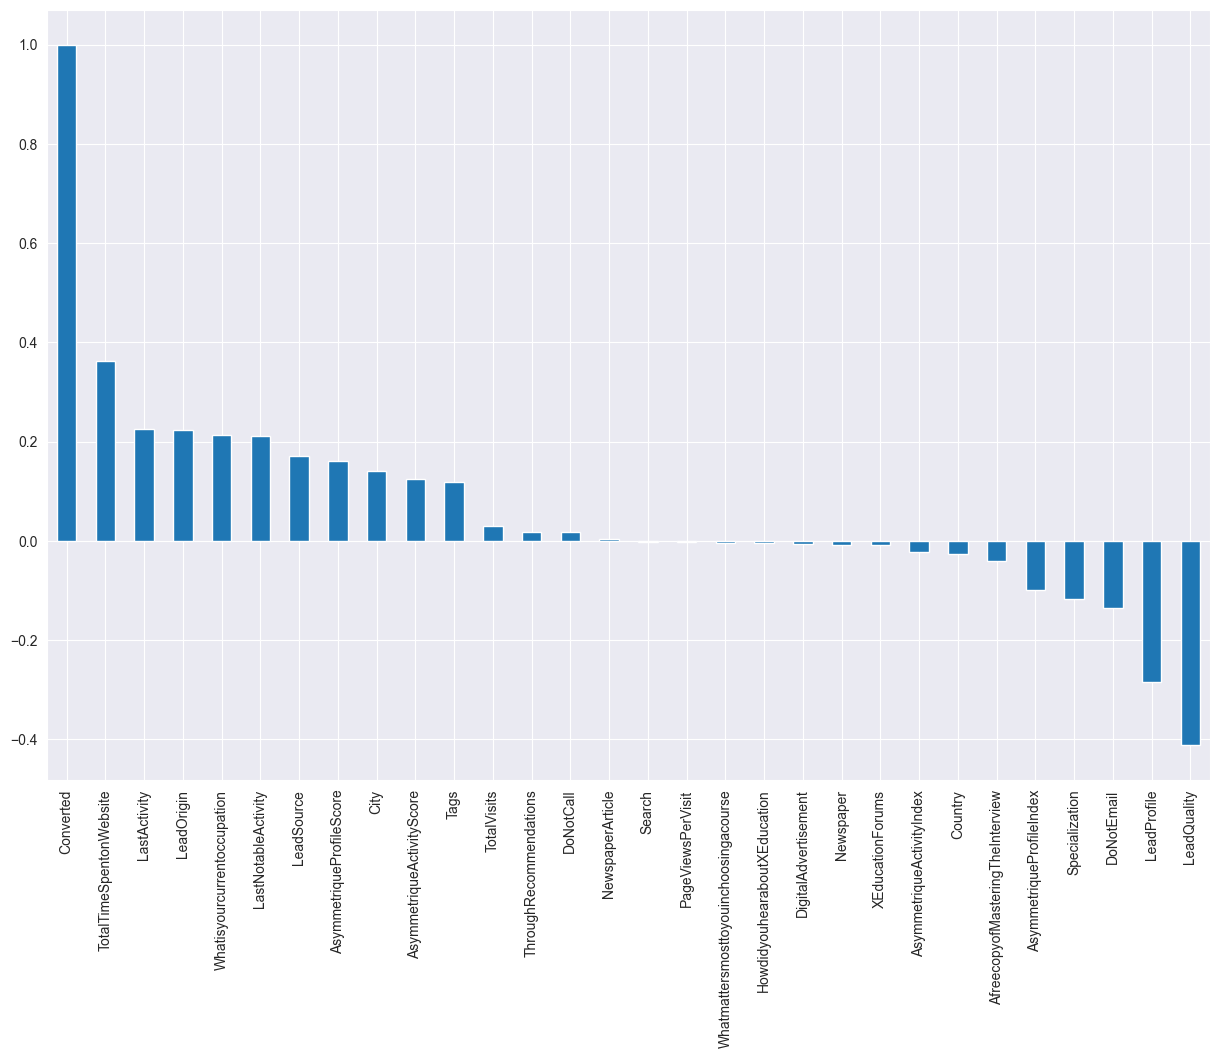

In [9]:
# Ver correlación con la variable objetivo
plt.figure(figsize=(15, 10))
df.corr()['Converted'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [10]:
# Eliminamos las columnas que tienen una correlación baja con la variable objetivo (menor a 0.1)
for col in df.columns:
    if abs(df[col].corr(df['Converted'])) < 0.1:
        df = df.drop(columns=[col], axis=1)
        
df.head()

,LeadOrigin,LeadSource,DoNotEmail,Converted,TotalTimeSpentonWebsite,LastActivity,Specialization,Whatisyourcurrentoccupation,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityScore,AsymmetriqueProfileScore,LastNotableActivity
0,0.0,6.0,0.0,0,0,10.0,15.0,4.0,8.0,1.0,4.0,4.0,15.0,15.0,8.0
1,0.0,7.0,0.0,0,674,5.0,15.0,4.0,14.0,2.0,4.0,4.0,15.0,15.0,4.0
2,1.0,1.0,0.0,1,1532,5.0,1.0,3.0,19.0,2.0,3.0,0.0,14.0,20.0,4.0
3,1.0,1.0,0.0,0,305,13.0,11.0,4.0,14.0,3.0,4.0,0.0,13.0,17.0,8.0
4,1.0,3.0,0.0,1,1428,1.0,15.0,4.0,19.0,2.0,4.0,0.0,15.0,18.0,8.0


## 3. Entrenamiento del modelo y evaluación

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# División del dataset en train y test
X = df.drop(columns=['Converted'], axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Diccionario de modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=200),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Entrenamiento y evaluación de modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = {'Accuracy': accuracy}
    print(f"{nombre} - Accuracy: {accuracy:.4f}")

# Mostrar resultados finales
df_resultados = pd.DataFrame(resultados).T
print(df_resultados)

# Selección del mejor modelo
mejor_modelo = df_resultados['Accuracy'].idxmax()
print(
    f"El mejor modelo es: {mejor_modelo} con un Accuracy de {df_resultados.loc[mejor_modelo, 'Accuracy']:.4f}")


(6468, 14) (2772, 14)
Regresión Logística - Accuracy: 0.8344
Árbol de Decisión - Accuracy: 0.8838
Random Forest - Accuracy: 0.9239
Gradient Boosting - Accuracy: 0.9361
                     Accuracy
Regresión Logística  0.834416
Árbol de Decisión    0.883838
Random Forest        0.923882
Gradient Boosting    0.936147
El mejor modelo es: Gradient Boosting con un Accuracy de 0.9361


In [12]:
# Entrenamiento del mejor modelo
mejor_modelo = GradientBoostingClassifier()
mejor_modelo.fit(X_train, y_train)

# Predicciones
y_pred = mejor_modelo.predict(X_test)
y_pred_proba = mejor_modelo.predict_proba(X_test)[:, 1]

# Reporte de Clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1695
           1       0.94      0.89      0.92      1077

    accuracy                           0.94      2772
   macro avg       0.94      0.93      0.93      2772
weighted avg       0.94      0.94      0.94      2772



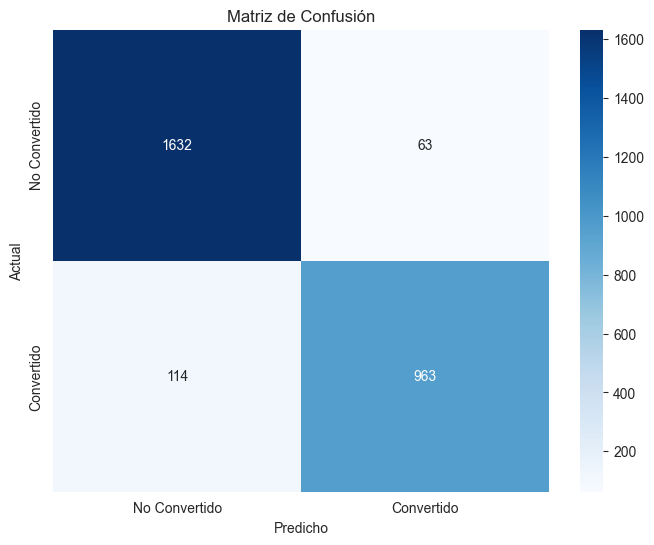

In [13]:
# Plot Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Convertido', 'Convertido'],
            yticklabels=['No Convertido', 'Convertido'])
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

## 4. Despliegue del modelo

In [14]:
# Guardar el modelo
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(mejor_modelo, file)